# **Multiclass Classification**
we have a data of movies and shows and we want to determine if it's a tv show or a movie.

the dataset used contains a collection of data about the show the title, the release year, the length and score, the number of votes and popularity.
we can use that data to find out if the show is tv show or a movie as we can see there are some features like the length, the ratings that can give a hint to the result.

# Background
Binary classification is a type of classification problem in machine learning where the goal is to predict a binary output variable that can take one of two possible values, such as 0 or 1, yes or no, true or false, etc. Examples of binary classification problems include predicting whether a customer will buy a product or not, whether an email is spam or not, whether a tumor is malignant or benign, etc.

Logistic regression is a popular statistical method for binary classification that models the probability of the binary output variable as a function of the input variables. It assumes that the output variable follows a logistic distribution, and estimates the parameters of the logistic function using a maximum likelihood estimation approach. Logistic regression is often used for binary classification problems where the input variables are continuous, categorical, or a mix of both. It outputs a probability value between 0 and 1, which can be thresholded to obtain the binary prediction.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import regplot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,accuracy_score,precision_score, recall_score, f1_score


In [ ]:

half_data = pd.read_excel('./data.xlsx', sheet_name='part1')
other_half_data = pd.read_excel('data.xlsx', sheet_name='part2')

other_half_data.drop(['release_date', 'ttype'], axis=1, inplace=True)

data = pd.concat([half_data, other_half_data], axis=0)

data.head()

,Title,Type,releaseYear,Certificate,Length,Score,Votes,Popularity
0,Sunset Boulevard,MOVIE,1950.0,PG,110.0,8.4,224704.0,18.431
1,His Girl Friday,MOVIE,1940.0,NaN,92.0,7.8,60244.0,14.759
2,Red River,MOVIE,1948.0,NaN,133.0,7.8,32210.0,12.400
3,The General,MOVIE,1926.0,NaN,79.0,8.1,92935.0,12.316
4,The Kid,MOVIE,1921.0,NaN,68.0,8.3,128096.0,14.865


In [ ]:


data['releaseYear'].fillna(data['releaseYear'].mode()[0], inplace=True)
data['Certificate'].fillna(data['Certificate'].mode()[0], inplace=True)
data['Length'].fillna(data['Length'].mode()[0], inplace=True)
data['Score'].fillna(data['Score'].mode()[0], inplace=True)
data['Votes'].fillna(data['Votes'].mode()[0], inplace=True)
data['Popularity'].fillna(data['Popularity'].mode()[0], inplace=True)

print("\nAfter imputing missing values:\n", data.head())

print("\nBefore Removing Duplicates:\n", data.count())

data.drop_duplicates(subset='Title',inplace=True)

print("\nAfter Removing Duplicates: \n", data.count())


After imputing missing values:
               Title   Type  releaseYear Certificate  Length  Score     Votes  \
0  Sunset Boulevard  MOVIE       1950.0          PG   110.0    8.4  224704.0   
1   His Girl Friday  MOVIE       1940.0           R    92.0    7.8   60244.0   
2         Red River  MOVIE       1948.0           R   133.0    7.8   32210.0   
3       The General  MOVIE       1926.0           R    79.0    8.1   92935.0   
4           The Kid  MOVIE       1921.0           R    68.0    8.3  128096.0   

   Popularity  
0      18.431  
1      14.759  
2      12.400  
3      12.316  
4      14.865  

Before Removing Duplicates:
 Title          18424
Type           22444
releaseYear    22444
Certificate    22444
Length         22444
Score          22444
Votes          22444
Popularity     22444
dtype: int64

After Removing Duplicates: 
 Title          3165
Type           3166
releaseYear    3166
Certificate    3166
Length         3166
Score          3166
Votes          3166
Popularit

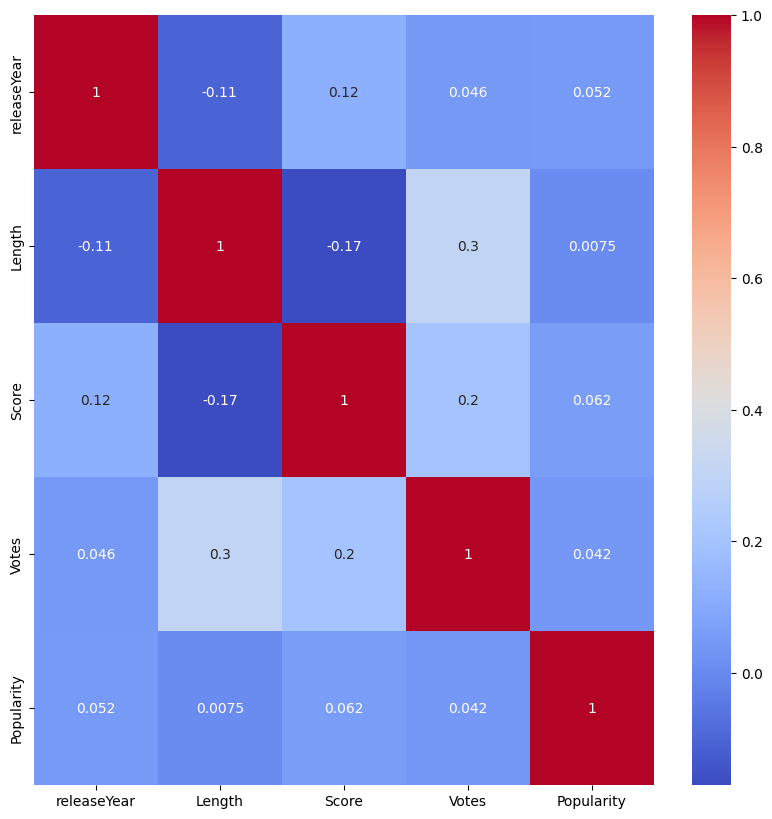

In [ ]:
numeric_data = data.select_dtypes(include='number') # select only numeric values
corr = numeric_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:

# train a separate logistic regression model for each class



0     MOVIE
1     MOVIE
2     MOVIE
3     MOVIE
4     MOVIE
      ...  
11    MOVIE
12    MOVIE
14    MOVIE
16    MOVIE
18    MOVIE
Name: Type, Length: 3166, dtype: object

In [ ]:
x = data.drop(['Title', 'Type', 'Certificate', 'Votes', 'Popularity', 'releaseYear'], axis=1)
y = data['Type']

y_classes = pd.get_dummies(data['Type'])
y_classes['Type']= data['Type']
print(len(y_classes.columns))
xTrain, xTest, yTrain, yTest = train_test_split(x, y_classes, test_size=0.2, random_state=42)


3


In [ ]:
print(yTrain)

      MOVIE  SHOW   Type
2550      0     1   SHOW
2260      0     1   SHOW
2924      1     0  MOVIE
1365      0     1   SHOW
1056      1     0  MOVIE
...     ...   ...    ...
3123      1     0  MOVIE
1100      0     1   SHOW
1135      1     0  MOVIE
1300      1     0  MOVIE
862       1     0  MOVIE

[2532 rows x 3 columns]


**create a logistic regression model for each class**

In [ ]:
class_count = len(y_classes.columns)-1

# using logistic regression (one for each class)

In [ ]:
models = []
print()
for i in range(class_count):
    y_train_i = yTrain[y_classes.columns[i]]
    model = LogisticRegression()
    model.fit(xTrain, y_train_i)
    models.append(model)


**make predictions on the testing data for each model**

In [ ]:
y_pred = []
y_pred_proba_MLR=[]
for model in models:
    y_pred_i = model.predict(xTest)
    y_pred_prob = model.predict_proba(xTest)
    y_pred_prob_i = [i[0] for i in y_pred_prob]
    y_pred.append(y_pred_i)
    y_pred_proba_MLR.append(y_pred_prob_i)
print(y_pred_proba_MLR[0])
print(y_pred_proba_MLR[1])

[8.877669366302854e-08, 9.730867390755904e-07, 0.001673519189990591, 0.002637799161259724, 0.9536612847413349, 0.9679043644036769, 0.9721503326784278, 0.01775901534837554, 0.00014440442556906685, 0.47819869242519664, 0.0013771604594270404, 0.0002617599702294804, 0.0003339470926779775, 0.5712618462988799, 0.00020168730078851116, 0.0010181712552853606, 0.9732549046382244, 0.0001398176515172711, 0.043757080290783734, 0.00508842188193781, 0.03626159048888855, 0.8544463692006451, 0.0032852716508169344, 0.0009863511144319048, 0.9696506396888848, 0.9521679890658831, 0.0003508615607710208, 0.007507763601907302, 0.09432400144582376, 0.0843808615898386, 0.21671117194932898, 0.9463043859922726, 0.0017291964470271814, 0.0004977230966950463, 0.012778866772331976, 0.47624760429270696, 0.01574662481659095, 0.4298502050614915, 0.027288709886681306, 0.0024515782667441366, 0.9691570420180575, 2.3297666214339152e-05, 0.002015699078209421, 0.47819869242519664, 0.003705580661097607, 7.96191558802839e-05, 0


**convert the predictions to the final predicted class label**

In [ ]:
y_pred_final = []

maxl=[]
for i in range(len(xTest)):
    # get the predicted class label for this instance
    res =[y_pred[j][i] for j in range(class_count)]
    
    max_prob =res.index(max(res))
    maxl.append(max_prob)
    pred_label = y_classes.columns[max_prob]
    y_pred_final.append(pred_label)

In [ ]:
print(y_pred_final)
print(maxl)

['MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'SHOW', 'SHOW', 'SHOW', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'SHOW', 'MOVIE', 'MOVIE', 'SHOW', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'SHOW', 'MOVIE', 'MOVIE', 'SHOW', 'SHOW', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'SHOW', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'SHOW', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'SHOW', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'SHOW', 'MOVIE', 'MOVIE', 'MOVIE', 'SHOW', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'SHOW', 'MOVIE', 'MOVIE', 'SHOW', 'SHOW', 'MOVIE', 'SHOW', 'SHOW', 'MOVIE', 'MOVIE', 'SHOW', 'MOVIE', 'MOVIE', 'SHOW', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'SHOW', 'MOVIE', 'MOVIE', 'SHOW', 'SHOW', 'SHOW', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'SHOW', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE', 'MOVIE'

**calculate the accuracy of the model**

In [ ]:
accuracy = accuracy_score(yTest['Type'], y_pred_final)

print("Accuracy:", accuracy)

Accuracy: 0.9085173501577287


**Calculate ROC**

In [ ]:

mapping = {'MOVIE':0, 'SHOW':1}
test_data = yTest['Type']
test_data = np.array([mapping[d] for d in test_data])
y_pred_proba_MLR_1 =np.array(y_pred_proba_MLR[0])
# Calculate ROC curve and AUC score
fpr_MLR, tpr_MLR, thresholds_MLR = roc_curve(test_data, y_pred_proba_MLR_1)

auc_MLR = roc_auc_score(yTest['Type'], y_pred_proba_MLR_1)

print("Logistic regression ROC AUC score: {:.4f}".format(auc_MLR))

Logistic regression ROC AUC score: 0.9637


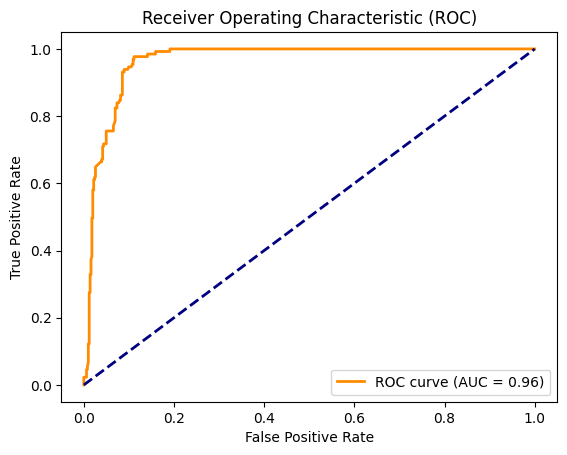

In [ ]:
# Plot the ROC curve
plt.plot(fpr_MLR, tpr_MLR, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_MLR)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## **using multiclass logistic regreession**

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# fit the model on the training data
model.fit(xTrain, yTrain['Type'])

# make predictions on the testing data
y_predMLR = model.predict(xTest)

# calculate the accuracy of the model
accuracyMLR = accuracy_score(yTest['Type'], y_predMLR)

print("Accuracy:", accuracyMLR)

Accuracy: 0.9085173501577287


In [ ]:
# Calculate predicted probabilities for test data
y_pred_proba_LR = model.predict_proba(xTest)
y_pred_proba_LR = y_pred_proba_LR[:, 1]  # use probabilities for positive class

mapping = {'MOVIE':0, 'SHOW':1}
test_data = yTest['Type']
test_data = [mapping[d] for d in test_data]

# Calculate ROC curve and AUC score
fpr_LR, tpr_LR, thresholds_LR = roc_curve(test_data, y_pred_proba_LR)
auc_LR = roc_auc_score(yTest['Type'], y_pred_proba_LR)

print("Logistic regression ROC AUC score: {:.4f}".format(auc_LR))

Logistic regression ROC AUC score: 0.9637


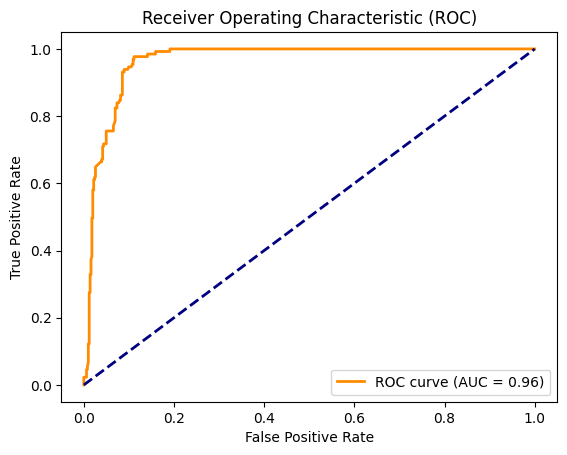

In [ ]:
# Plot the ROC curve
plt.plot(fpr_LR, tpr_LR, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_LR)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# using KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN model with k=3
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
# Train the model on the training data
knn.fit(xTrain, yTrain['Type'])

# Make predictions on the testing data
y_predKNN = knn.predict(xTest)

# Calculate the accuracy of the model
accuracyKNN = accuracy_score(yTest['Type'], y_predKNN)

print("Accuracy:", accuracyKNN)

Accuracy: 0.9148264984227129


**Calculate ROC**

In [ ]:
# Calculate predicted probabilities for test data
y_pred_proba_knn = knn.predict_proba(xTest)
y_pred_proba_knn = y_pred_proba_knn[:, 1]  # use probabilities for positive class
# Calculate ROC curve and AUC score
mapping = {'MOVIE':0, 'SHOW':1}
test_data = yTest['Type']
test_data = [mapping[d] for d in test_data]
print(test_data)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(test_data, y_pred_proba_knn)
auc_knn = roc_auc_score(yTest['Type'], y_pred_proba_knn)

print("K-Nearest Neighbors ROC AUC score: {:.4f}".format(auc_knn))

[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 

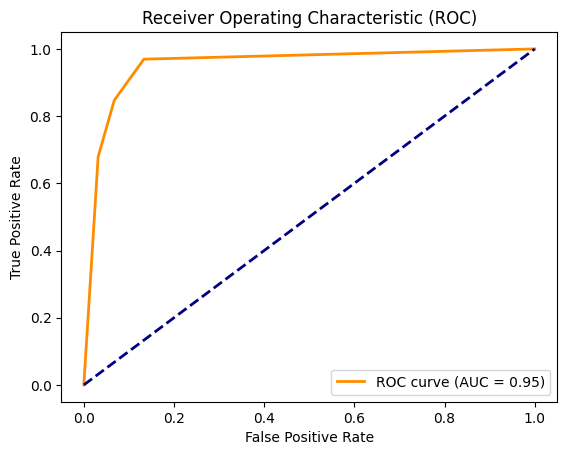

In [ ]:
# Plot the ROC curve
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#using SVM

In [ ]:

from sklearn.svm import SVC
# Create an SVM model with a linear kernel and OVO strategy
svm = SVC(kernel='linear', decision_function_shape='ovo',probability=True)

# Train the model on the training data
svm.fit(xTrain, yTrain['Type'])

# Make predictions on the testing data
y_predSVM = svm.predict(xTest)

# Calculate the accuracy of the model
accuracySVM = accuracy_score(yTest['Type'], y_predSVM)

print("Accuracy:", accuracySVM)

Accuracy: 0.9100946372239748


**Calculate ROC**

In [ ]:
# Calculate predicted probabilities for test data
y_pred_proba_svm = svm.predict_proba(xTest)
y_pred_proba_svm = y_pred_proba_svm[:, 1]  # use probabilities for positive class

mapping = {'MOVIE':0, 'SHOW':1}
test_data = yTest['Type']
test_data = [mapping[d] for d in test_data]

# Calculate ROC curve and AUC score
fpr_svm, tpr_svm, thresholds_svm = roc_curve(test_data, y_pred_proba_svm)
auc_svm = roc_auc_score(yTest['Type'], y_pred_proba_svm)

print("SVM ROC AUC score: {:.4f}".format(auc_svm))

SVM ROC AUC score: 0.9631


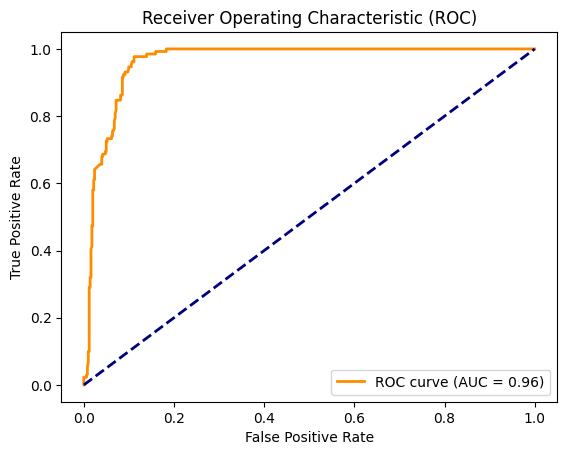

In [ ]:
# Plot the ROC curve
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# models evaluation

In [ ]:
# Calculate the metrics for each model
acc_knn = accuracy_score(yTest['Type'], y_predKNN)
acc_svm = accuracy_score(yTest['Type'], y_predSVM)
acc_lr = accuracy_score(yTest['Type'], y_pred_final)
acc_Mlr = accuracy_score(yTest['Type'], y_predMLR)

prec_knn = precision_score(yTest['Type'], y_predKNN, average='weighted')
prec_svm = precision_score(yTest['Type'], y_predSVM, average='weighted')
prec_lr = precision_score(yTest['Type'], y_pred_final, average='weighted')
prec_Mlr = precision_score(yTest['Type'], y_predMLR, average='weighted')

rec_knn = recall_score(yTest['Type'], y_predKNN, average='weighted')
rec_svm = recall_score(yTest['Type'], y_predSVM, average='weighted')
rec_lr = recall_score(yTest['Type'], y_pred_final, average='weighted')
rec_Mlr = recall_score(yTest['Type'], y_predMLR, average='weighted')

f1_knn = f1_score(yTest['Type'], y_predKNN, average='weighted')
f1_svm = f1_score(yTest['Type'], y_predSVM, average='weighted')
f1_lr = f1_score(yTest['Type'], y_pred_final, average='weighted')
f1_Mlr = f1_score(yTest['Type'], y_predMLR, average='weighted')

# Create the table
print("{:<25} {:<10} {:<10} {:<10} {:<10} {:<10}".format('', 'Accuracy', 'Precision', 'Recall', 'F1-score','ROC'))
print("{:<25} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format('K-Nearest Neighbors', acc_knn, prec_knn, rec_knn, f1_knn, auc_knn))
print("{:<25} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format('Support Vector Machine', acc_svm, prec_svm, rec_svm, f1_svm, auc_svm))
print("{:<25} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format('Logistic Regression', acc_lr, prec_lr, rec_lr, f1_lr, auc_LR))
print("{:<25} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format('M Logistic Regression', acc_Mlr, prec_Mlr, rec_Mlr, f1_Mlr, auc_LR))

                          Accuracy   Precision  Recall     F1-score   ROC       
K-Nearest Neighbors       0.9148     0.9191     0.9148     0.9164     0.9513    
Support Vector Machine    0.9101     0.9263     0.9101     0.9141     0.9631    
Logistic Regression       0.9085     0.9123     0.9085     0.9100     0.9637    
M Logistic Regression     0.9085     0.9123     0.9085     0.9100     0.9637    
